UNSUPERVISED LEARNING FOR SEGMENTATIONS

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим файл с интересами пользователей и рассчитанной ранее вероятностью совершения конверсии df_cleaned_with_proba.xlsx

In [15]:
df = pd.read_csv('/Users/denis/Desktop/agusha_low_memory.csv')


In [6]:
df.columns.tolist()

['weboid',
 'Public_administrations',
 'Holidays',
 'Law',
 'Sports',
 'Banking',
 'Family',
 'News',
 'Business_Administration_and_Management',
 'Furniture',
 'Building_and_civil_engineering',
 'Fine_dining_and_local_produce',
 'Going_out',
 'Marriage_civil_union',
 'Cooking',
 'Films',
 'Careers_and_occupational_training',
 'Software',
 'Politics',
 'Tourism',
 'Telecom_operators',
 'Soccer',
 'History',
 'Dating',
 'Entrepreneur',
 'Asset_management',
 'Music',
 'DIY',
 'Real_estate',
 'Teaching',
 'Clothing',
 'Lawyer',
 'Phone',
 'Weather',
 'Graphic_design',
 'Art',
 'Desserts',
 'Finance',
 'Fashion_trend',
 'Higher_education',
 'Language',
 'Cars',
 'Sports_equipments_and_Outdoor_gear',
 'Software_development',
 'Cameras',
 'Catchup_TV',
 'TV_Shows',
 'Gas_and_electricity',
 'Arts_and_crafts',
 'Advertising',
 'Accessories',
 'Good_deals',
 'ISP_and_Browsers',
 'Personal_care',
 'Gardening',
 'Science',
 'Outdoor_activities',
 'Diet_and_nutrition',
 'Theatre',
 'Pregnancy',
 'C


Поскольку мы не будем ничего прогнозировать, нет необходимости разбивать наш набор данных на несколько частей. Мы можем работать со всей базой данных.
На практике, как правило, число кук  от 50К до 200К дает надежные результаты с приемлемым временем вычислений.
Тем не менее, мы все еще должны удалить столбцы, которые не имеют отношения к сегментации.
Здесь важно отметить, что мы не можем использовать столбец «Page_Visit» в нашей сегментации, поскольку мы не сможем получить эту информацию, когда будем применять нашу сегментацию к новым кукам, поступающим ежедневно в базу данных.

А вот рассчитанную вероятность посещения сохраним -- он рассчитывается на основе интересов и будет служить прокси-метрикой.


In [17]:
#Уберите лишние колонки .drop(['колонка1', 'колонка2'], axis = 1)

#TO FILL
df_segmentation = df.drop([
     'weboid',
     'female',
     'male',
     'age_18_24',
     'age_25_34',
     'age_35_49',
     'age_50_64',
     'age_65_110',
     'income_low',
     'income_middle',
     'income_middle_high',
     'income_high',
     'income_top'], axis = 1)
#END TO FILL

In [18]:
df_segmentation = df_segmentation.fillna(0) 
df_segmentation

,Public_administrations,Holidays,Law,Sports,Banking,Family,News,Business_Administration_and_Management,Furniture,Building_and_civil_engineering,...,Churn_Telecom,Spanish_Travel,Veg_and_Vegan,American_Football,Top_French_Engineering_schools,Insurance_churning,ELearning,Medical_Schools,Snacks,surf_intensity
0,0.0,0.0,0.0,11.0,0.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,20.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99997,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### DIMENSION REDUCTION AND VISUALIZATION WITH PCA


Давайте применим PCA для визуализации наших данных. 

PCA реализован в scikit-learn 


In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components= 0.5)


pca_representation=pca_representation=pca.fit_transform(df_segmentation)


print('As a reminder, the shape of our original data (before PCA) was: '+str(df_segmentation.shape))
print('The size of the new representation is: '+str(pca_representation.shape))

As a reminder, the shape of our original data (before PCA) was: (100000, 187)
The size of the new representation is: (100000, 18)


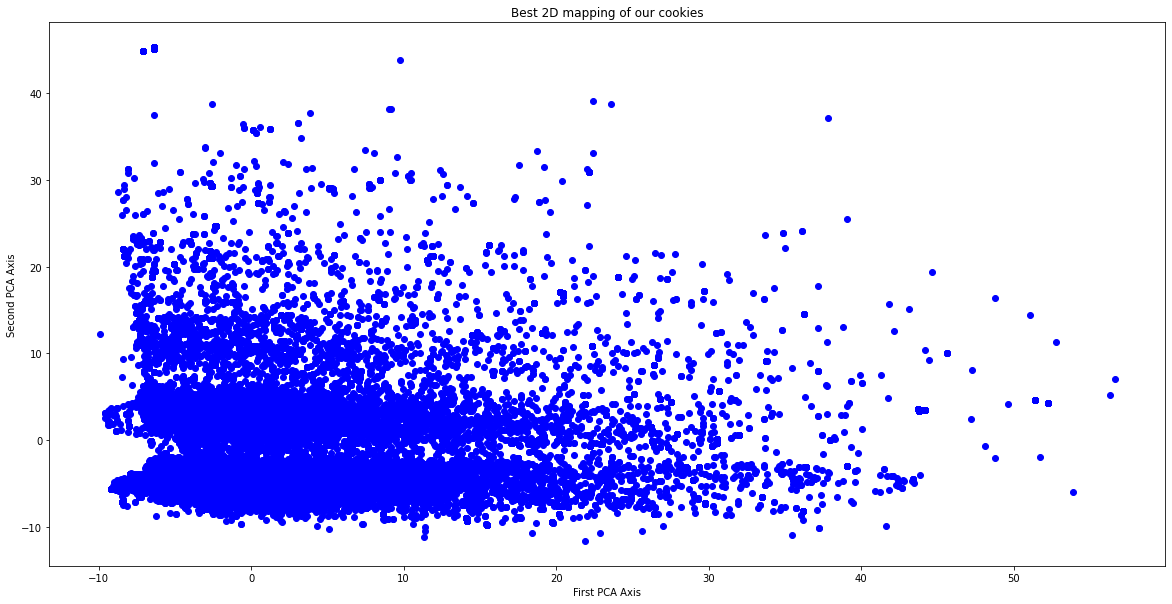

In [39]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,1],c='blue')
ax.set_xlabel('First PCA Axis')
ax.set_ylabel('Second PCA Axis')
ax.set_title('Best 2D mapping of our cookies')
plt.show()

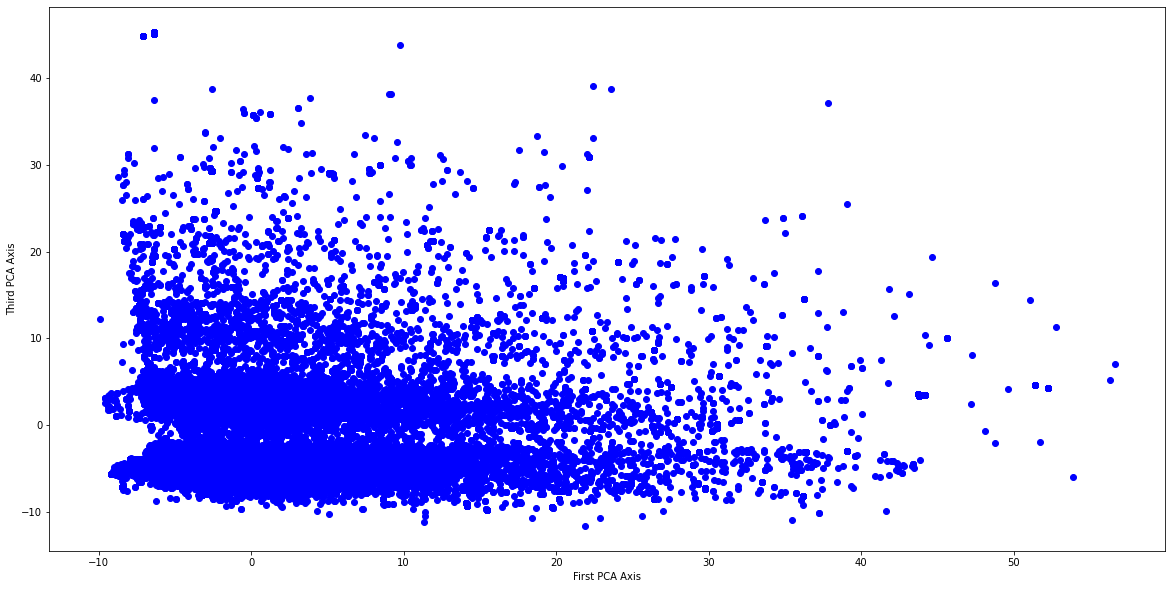

In [40]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,0],pca_representation[:,1],c='blue')
ax.set_xlabel('First PCA Axis')
ax.set_ylabel('Third PCA Axis')
plt.show()

In [ ]:
# поиграться с другими измерениями

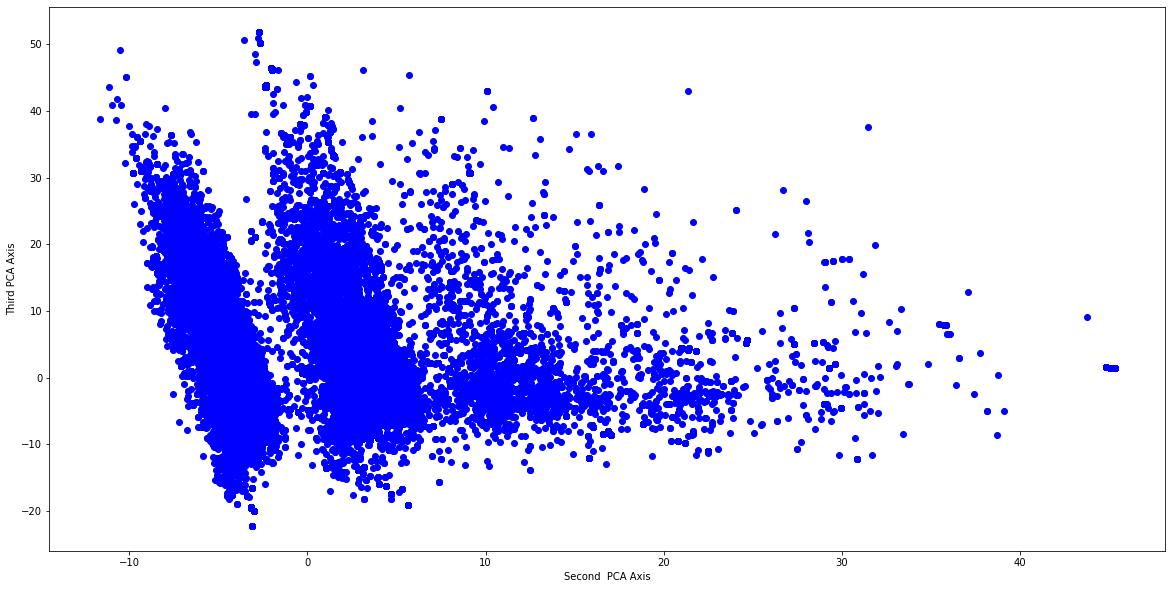

In [41]:
fig,ax=plt.subplots(figsize=(20, 10))
ax.scatter(pca_representation[:,1],pca_representation[:,2],c='blue')
ax.set_xlabel('Second  PCA Axis')
ax.set_ylabel('Third PCA Axis')
plt.show()

### CLUSTERING THE COOKIES WITH HC

По этим 2D-графикам, может быть трудно представить, что в данных есть четкие кластеры. Это потому, что наш мозг не может изобразить объекты в более чем 3 измерениях. Это одно из больших преимуществ подхода машинного обучения в целом: поиск шаблонов в многомерных пространствах.

 pip install fastcluster

In [42]:
!pip install fastcluster

In [43]:
class HierarchicalClustering:
    
    #Instantiate the object and computes the distance matrix between the points 
    def __init__(self,dataset,method_param='ward',metric_param='euclidean'):

        #faster implementation than scipy 
        from fastcluster import  linkage_vector
        from scipy.spatial.distance import pdist

        self.Z = linkage_vector(dataset,method=method_param,metric=metric_param)

    #plot the dendrogram of the hierarchical clustering
    def dendrogram(self,max_group=10):
        from scipy.cluster.hierarchy import dendrogram
        import matplotlib.pyplot as plt
        #affichage du dendrogramme
        fig,ax=plt.subplots(figsize=(10,20))
        ax.set_title("Dendrogram")
        dendrogram(self.Z,orientation='top',truncate_mode='lastp', p=max_group,show_contracted=True)
        plt.show()

    #  Outputs the group of each point k: cluster_numbers
    def groups(self,k):
        from scipy.cluster.hierarchy import fcluster
        #cluster hierarchy by using loadings of ACP
        groupes_cah = fcluster(self.Z,k,criterion='maxclust')
        return groupes_cah

In [44]:

hc=hc=HierarchicalClustering(pca_representation)


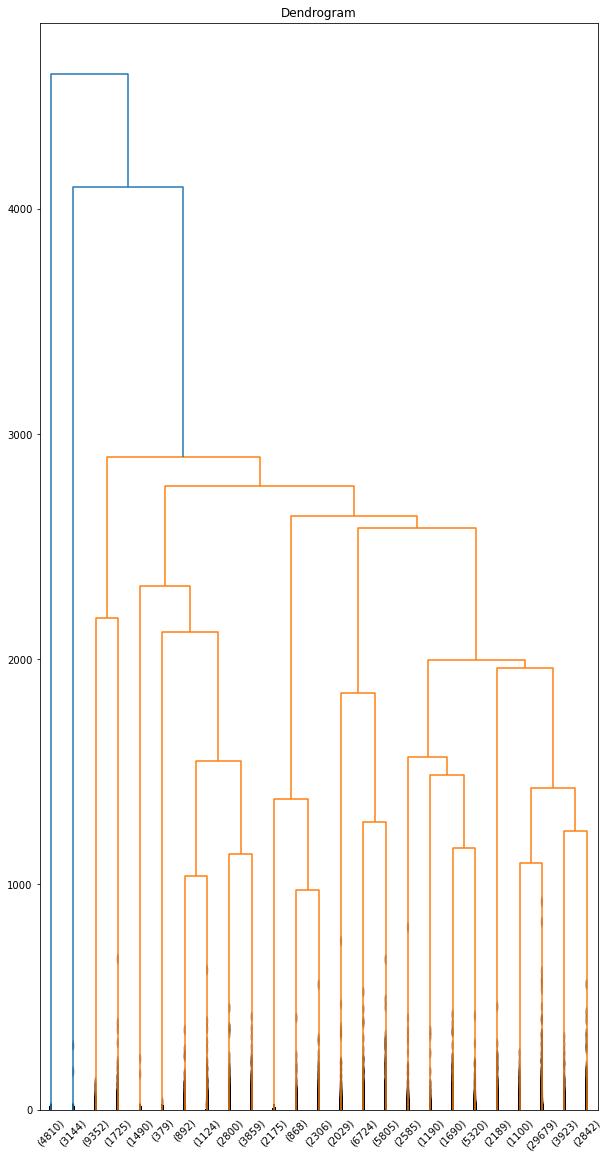

In [45]:
hc.dendrogram(max_group=25)

процесс выбора количества кластеров очень эмпирический. 
В реальных проектах мы традиционно выбираем число от 5 до 20, чтобы иметь достаточно групп, но не запутать клиента.
Обратите внимание, что алгоритм автоматически дает рекомендуемое количество кластеров (определяется количеством цветов на листьях). Это число является в высшей степени теоретическим


In [46]:
clusters_predicted_5=hc.groups(5)

In [47]:
print(clusters_predicted_5)

[2 4 5 ... 5 1 4]


In [48]:
clusters_predicted_5

array([2, 4, 5, ..., 5, 1, 4], dtype=int32)

In [49]:
def group_proportions(groupes_cah):
    L=[]
    p=[]
    clus=[]
    for i in np.unique(groupes_cah):
        L.append(list(groupes_cah).count(i))
        p.append(float(L[i-1])/len(groupes_cah))
        clus.append(i)
    ddd=pd.DataFrame({'cluster':clus,'count':L,'ratio':p})
    ddd=ddd.set_index('cluster')
    return ddd

In [50]:
group_proportions(clusters_predicted_5)

,count,ratio
cluster,,
1,4810,0.04810
2,3144,0.03144
3,11077,0.11077
4,10544,0.10544
5,70425,0.70425


In [51]:
def show2d(data,clusters,a=0,b=1):
    import matplotlib.patches as mpatches
    colors={}
    colors_list=["#1CE6FF","#FF34FF","#FF4A46","#008941","#006FA6","#A30059","#FFDBE5","#7A4900","#0000A6","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007","#809693","#FEFFE6","#1B4400"]
    for i in range(len(colors_list)):
        colors[i+1]=colors_list[i]
        
    plt.figure(figsize=(20, 10))
    dfCloud=pd.DataFrame(dict(x=data[:,a], y=data[:,b], cluster=clusters))
    plt.scatter(dfCloud['x'],dfCloud['y'],marker='o',linewidths=0,s=20, c=dfCloud['cluster'].apply(lambda x: colors[x]))  # plot points with cluster dependent colors

    n_cluster=int(dfCloud.cluster.unique().shape[0])
    class_colours=list(colors.values())[:n_cluster]
    classes=list(range(1,n_cluster+1))
    recs=[]
    for i in range(0,len(class_colours)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))

    plt.legend(recs,classes,loc='best')

    plt.show()

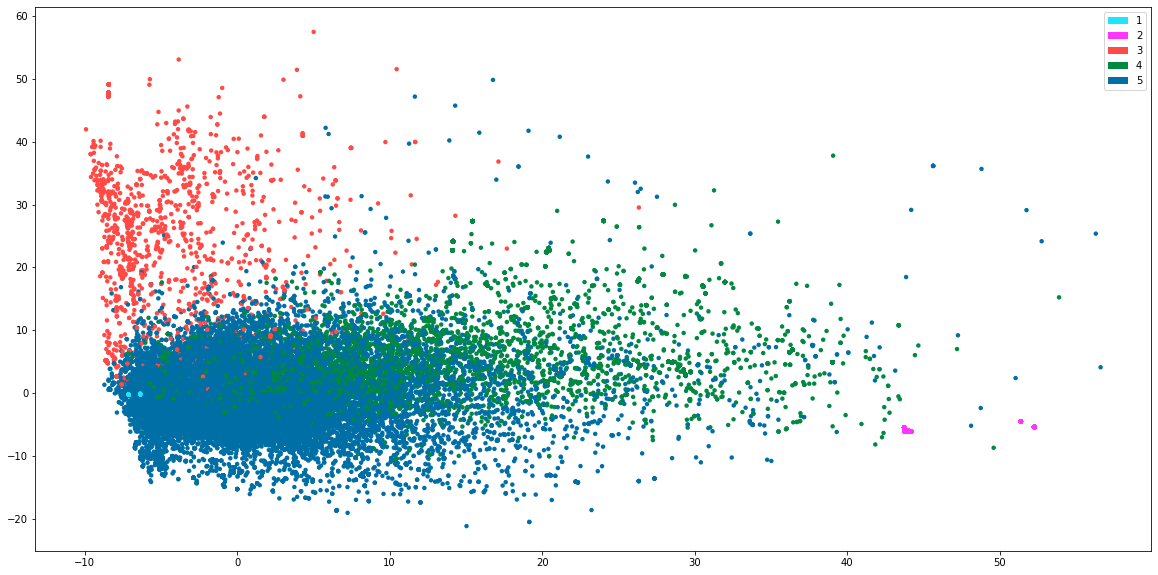

In [52]:
show2d(pca_representation,clusters_predicted_5,a=0,b=5)

Для объяснения поведенческих трендов в наших кластерах посчитаем аплифты

In [53]:
def clustDesc(original_dataframe,clusters_predicted,i):

    t1=original_dataframe[clusters_predicted==i].mean()
    t2=original_dataframe.mean()

    t4=t1/t2

    d= pd.DataFrame({'AVGCluster':t1,'AVG':t2, 'Uplift':t4}).sort_values(by='Uplift',ascending=False)

 
    cols=['AVGCluster','AVG','Uplift']
    d=d[cols]
    return d

In [28]:
clustDesc(df_segmentation,clusters_predicted_5,1)

,AVGCluster,AVG,Uplift
Beauty_treatments,20.000000,1.12083,17.843919
Fragrance,20.000000,1.14614,17.449875
Accessories,20.000000,1.38602,14.429806
Footwear,1.951767,0.15300,12.756648
Graphic_design,20.000000,1.67795,11.919306
...,...,...,...
Snacks,0.000000,0.50665,0.000000
Films,0.000000,0.00000,NaN
Dentist,0.000000,0.00000,NaN
Top_French_Engineering_schools,0.000000,0.00000,NaN


In [54]:
clustDesc(df_segmentation,clusters_predicted_5,2)

,AVGCluster,AVG,Uplift
Fantasy,16.723919,0.78193,21.388000
Dance,10.344148,0.55213,18.734986
Gambling,15.416349,0.85918,17.943095
Careers_and_occupational_training,16.248410,1.17853,13.787014
Christmas,15.303753,1.19007,12.859540
...,...,...,...
Public_administrations,0.000000,0.78565,0.000000
Films,0.000000,0.00000,NaN
Dentist,0.000000,0.00000,NaN
Top_French_Engineering_schools,0.000000,0.00000,NaN


In [55]:
clusters_predicted_5

array([2, 4, 5, ..., 5, 1, 4], dtype=int32)

In [56]:
df['cluster_num'] = clusters_predicted_5.tolist()

In [32]:
df

,weboid,Public_administrations,Holidays,Law,Sports,Banking,Family,News,Business_Administration_and_Management,Furniture,...,age_25_34,age_35_49,age_50_64,age_65_110,income_low,income_middle,income_middle_high,income_high,income_top,cluster_num
0,Q4ClKbuqUKFD,NaN,NaN,NaN,11.0,NaN,16.0,NaN,NaN,NaN,...,12.0,13,9.0,2.0,13,10.0,10.0,9.0,8.0,2
1,SUX-hIAmJZFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,2,5.0,1.0,18,3.0,11.0,16.0,3.0,4
2,AtNK-YP1FkEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,10,8.0,15.0,14,14.0,14.0,14.0,13.0,5
3,skX5nOb6h-qy,NaN,NaN,NaN,NaN,NaN,20.0,8.0,NaN,NaN,...,19.0,6,17.0,20.0,20,8.0,2.0,18.0,3.0,4
4,QRbnPTL8R3dB,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,20.0,20,3.0,19.0,1,1.0,16.0,20.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,BNx8X4DaJYoE,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,...,12.0,13,9.0,3.0,13,10.0,10.0,10.0,8.0,4
99996,ClWvkRLTpMQK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,10,9.0,10.0,17,14.0,12.0,9.0,10.0,5
99997,bk9hxlvccdxu,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,9,10.0,3.0,10,4.0,6.0,8.0,18.0,5
99998,VzFDPWm0XOxX,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,20,19.0,18.0,1,20.0,1.0,19.0,3.0,1
